In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

KNN = 'knn_results.csv'
SKLEARN = 'sklearn_knn.csv'

knn = pd.read_csv(KNN)
sklearn = pd.read_csv(SKLEARN)

In [2]:
# fixing knn
extract_function_name = lambda x: str(x).split(' ')[1].split('_')[0]

# lamba function on column
knn['Model'] = knn['Model'].apply(extract_function_name)

# fixing sklearn
sklearn = sklearn.rename(columns={'param_metric': 'Distance Metric', 'param_weights': 'Weight Metric'})

In [3]:
sklearn.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,Distance Metric,param_n_neighbors,Weight Metric,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.003593,0.001204,0.143763,0.030398,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.645458,0.641691,0.638761,0.643365,0.662060,0.646267,0.008195,55
1,1,0.002800,0.000400,0.055700,0.001385,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.645877,0.642110,0.639180,0.641272,0.660385,0.645765,0.007625,56
2,2,0.002865,0.000450,0.129273,0.003929,euclidean,5,uniform,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.665132,0.657179,0.652574,0.668899,0.662898,0.661336,0.005798,50
3,3,0.002601,0.000491,0.063915,0.002876,euclidean,5,distance,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei...",0.663458,0.652574,0.650900,0.665132,0.664154,0.659244,0.006175,53
4,4,0.002402,0.000489,0.136133,0.017022,euclidean,7,uniform,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",0.673504,0.668481,0.654667,0.682294,0.673786,0.670546,0.009096,44


In [4]:
knn.head()

,K,Model,Accuracy,Sensitivity,Specificity,Precision,F1_score
0,5,euclidean,0.656195,0.635871,0.676349,0.662635,0.648762
1,5,cosine,0.653783,0.647498,0.659815,0.655609,0.651377
2,5,manhattan,0.659285,0.647884,0.670398,0.662658,0.655047
3,7,euclidean,0.665764,0.637705,0.693704,0.675500,0.655810
4,7,cosine,0.665537,0.653583,0.677287,0.669395,0.661264


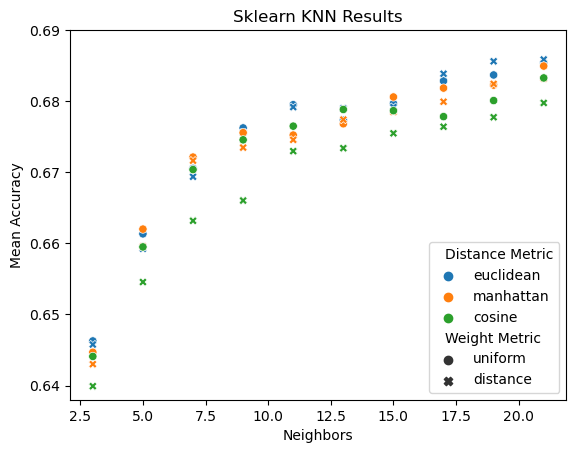

In [5]:
sns.scatterplot(data=sklearn, x='param_n_neighbors', y='mean_test_score', hue='Distance Metric', style='Weight Metric')
plt.ylim(0.638,0.69)
plt.ylabel('Mean Accuracy')
plt.xlabel('Neighbors')
plt.title('Sklearn KNN Results')
plt.show()

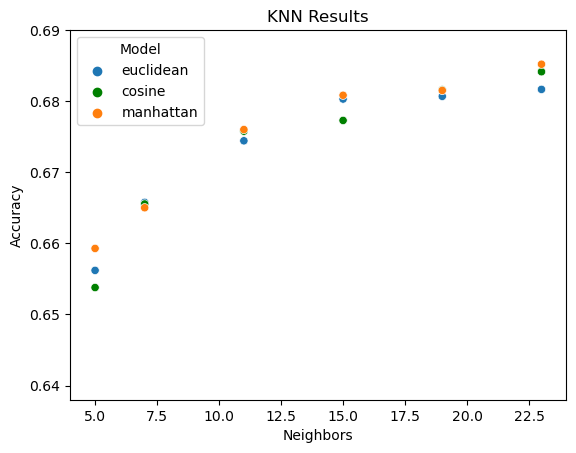

In [6]:
colors = {'euclidean': '#1F77B4', 'manhattan': '#FF7F0E', 'cosine': 'green'}
sns.scatterplot(data=knn, x='K', y='Accuracy', hue='Model', palette=colors)
plt.ylim(0.638,0.69)
plt.xlim(4,24)
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.title('KNN Results')
plt.show()